In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
16,47,25000,1
67,23,82000,0
42,35,108000,0
181,31,71000,0
98,35,73000,0


**Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
												df['Purchased'],
												test_size=0.3,random_state=0)

In [6]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

**StandardScaler**

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Use fit_transform only on training data***

***Use transform on validation/test data***

***You only fit on training data, never on test data! This prevents data leakage.***

***You learn on training data but transform both test and training data***

In [86]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [87]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [88]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [89]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [90]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [91]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [92]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [93]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effect of Scaling**

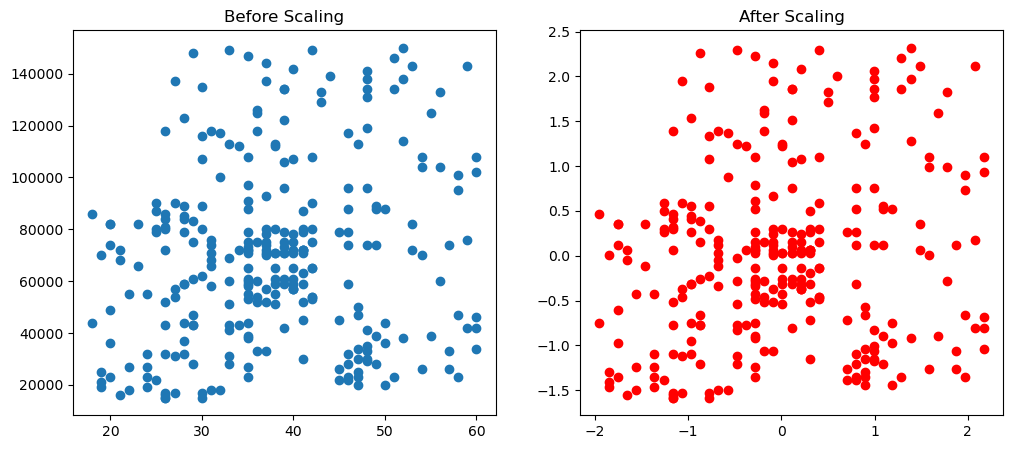

In [94]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')
plt.show()

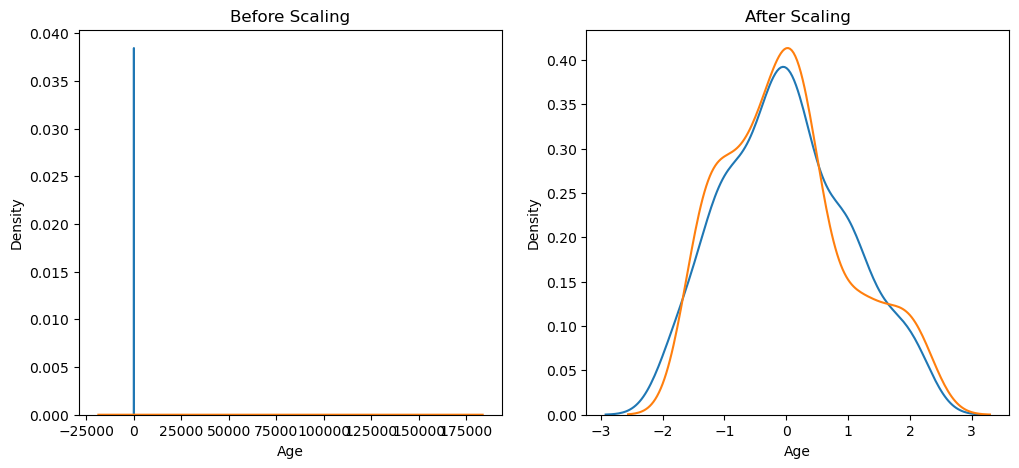

In [95]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
#before scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

#after scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

**Comparison of Distributions**

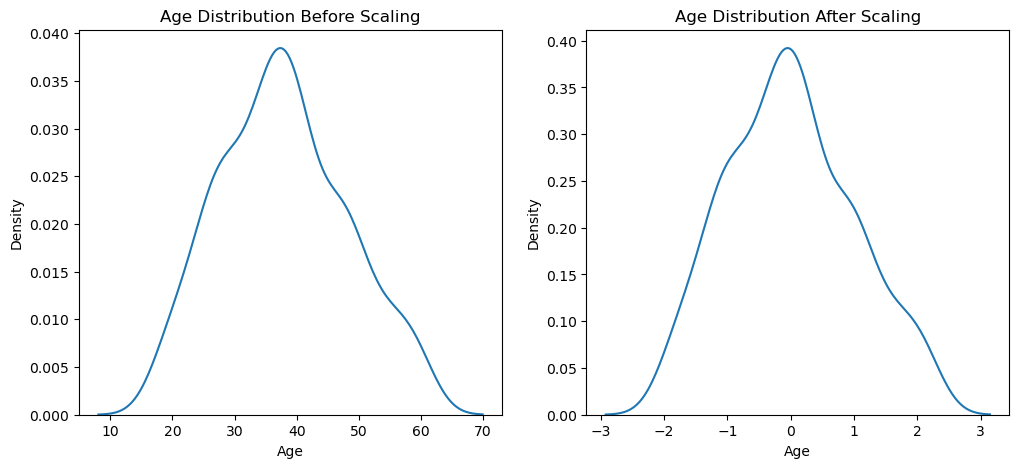

In [96]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
#before scaling 
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax = ax1)

#after scaling 
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax = ax2)

plt.show()

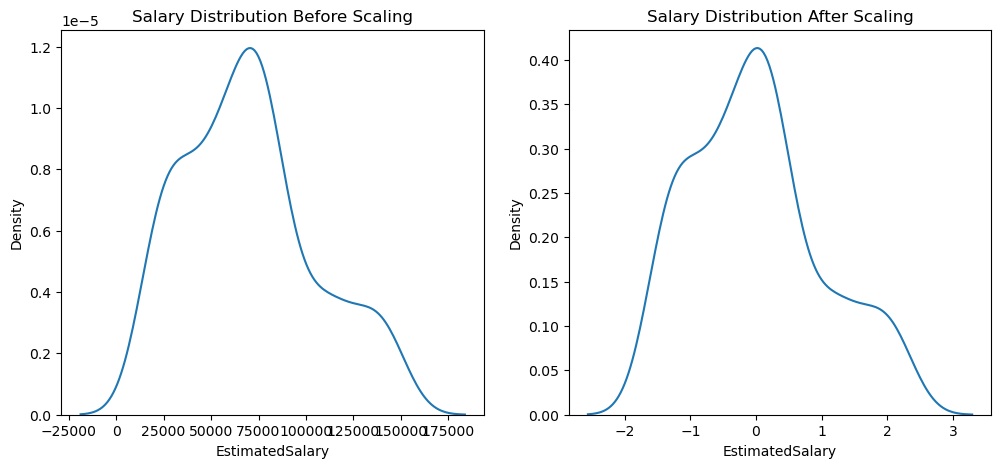

In [97]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
#before scaling 
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

#after scaling 
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

**Why scaling is important?**

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression(solver='liblinear')
lr_scaled = LogisticRegression(solver='liblinear')

In [100]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [101]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.875


In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier(splitter='best')
dt_scaled = DecisionTreeClassifier(splitter='best')

In [106]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt.predict(X_test_scaled)

In [108]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.6583333333333333


**Effect of Outlier**

In [109]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})
df = pd.concat([df, new_data], ignore_index=True)

In [110]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


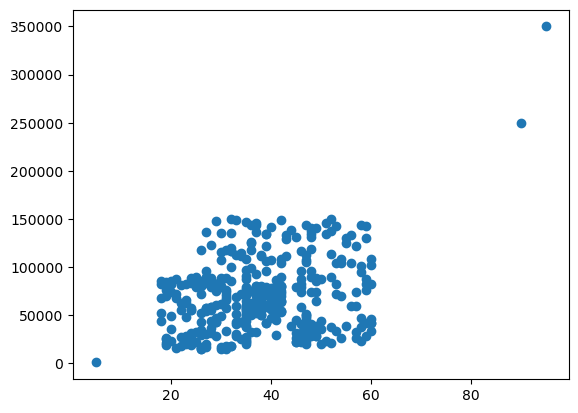

In [111]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

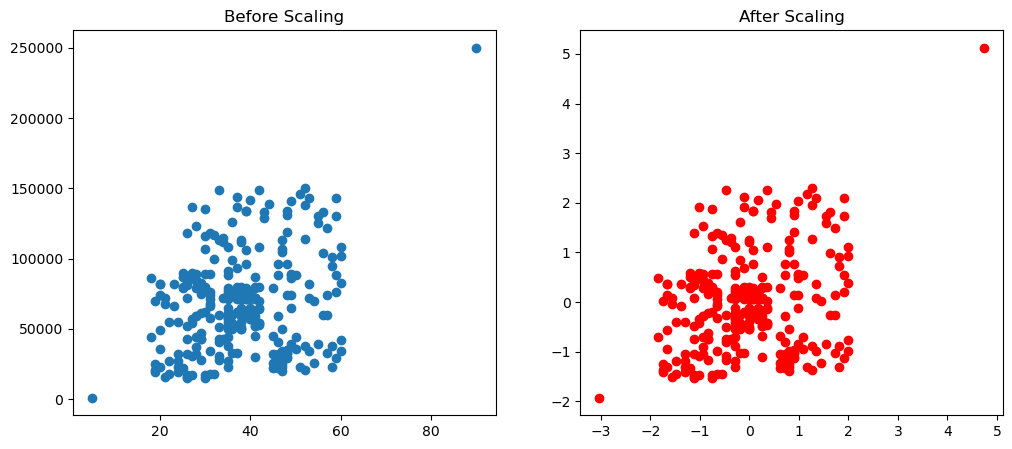

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()